In [2]:
import pathlib

import requests

from ai2_internal.citation_mentions.interface import Instance, Prediction
from mmda.parsers.pdfplumber_parser import PDFPlumberParser, _SPLIT_AT_PUNCTUATION
from mmda.rasterizers.rasterizer import PDF2ImageRasterizer
from mmda.types import api

pdfs_dir = pathlib.Path.home() / "mmda" / "pdfs"

def print_mentions(pdf_file):
    doc = PDFPlumberParser(split_at_punctuation=_SPLIT_AT_PUNCTUATION).parse(str(pdf_file))

    instances = [
        Instance(
            symbols=doc.symbols, 
            tokens=[api.SpanGroup.from_mmda(sg) for sg in doc.tokens],
            rows=[api.SpanGroup.from_mmda(sg) for sg in doc.rows],
            pages=[api.SpanGroup.from_mmda(sg) for sg in doc.pages]
        )
    ]
    req_json = {"instances": [i.dict() for i in instances]}

    url = 'http://citation-mentions.v0.prod.models.s2.allenai.org/invocations'
    resp = requests.post(url, json=req_json).json()
    predictions = [
        Prediction(**p)
        for p in resp['predictions']
    ]
    doc.annotate(mentions=[mention.to_mmda() for mention in predictions[0].mentions])

    print("mentions from regular service:")
    for mention in doc.mentions:
        print(mention.symbols)
    print()

    url_onnx = 'http://citation-mentions.v0-onnx.prod.models.s2.allenai.org/invocations'
    resp = requests.post(url_onnx, json=req_json).json()
    predictions = [
        Prediction(**p)
        for p in resp['predictions']
    ]
    doc = PDFPlumberParser(split_at_punctuation=_SPLIT_AT_PUNCTUATION).parse(str(pdf_file))
    doc.annotate(mentions=[mention.to_mmda() for mention in predictions[0].mentions])

    print("mentions from onnx service:")
    for mention in doc.mentions:
        print(mention.symbols)

/home/ubuntu/.pyenv/versions/mmda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


reading pdf from from /home/ubuntu/mmda/pdfs/00c6c9c0eb3423c7bbf96e8c1060ff9782dd24b4.pdf



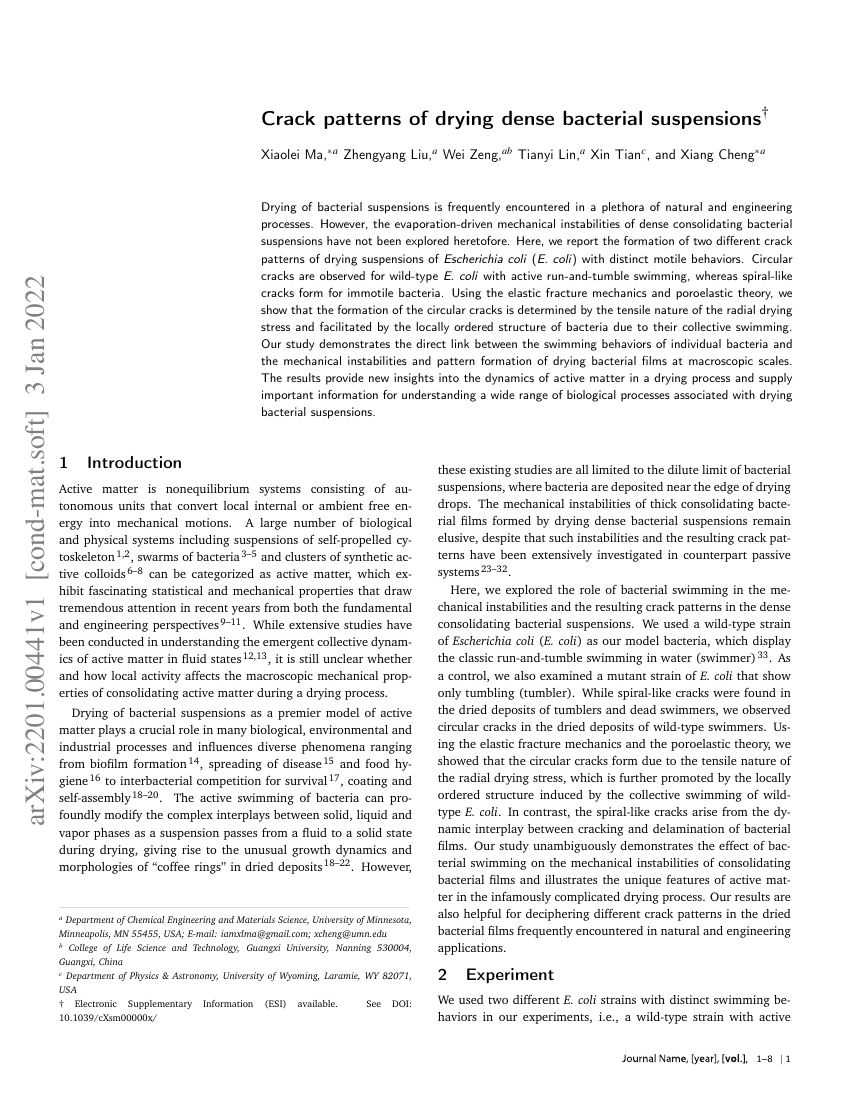

mentions from regular service:
['1']
['1']
['2']
['3']
['5']
['6']
['8']
['9']
['11']
['12']
['13']
['14']
['15']
['16']
['17']
['18']
['20']
['18']
['22']
['23']
['32']
['33']

mentions from onnx service:
['1']
['1']
['2']
['3']
['5']
['6']
['8']
['9']
['11']
['12']
['13']
['14']
['15']
['16']
['17']
['18']
['20']
['18']
['22']
['23']
['32']
['33']


In [3]:
pdf_file = pdfs_dir / "00c6c9c0eb3423c7bbf96e8c1060ff9782dd24b4.pdf"
print(f"reading pdf from from {pdf_file}\n")

images = PDF2ImageRasterizer().rasterize(pdf_file, dpi=100)
display(images[0])
print_mentions(pdf_file)

reading pdf from from /home/ubuntu/mmda/pdfs/03bf74dfc38e44152b25bc94783d6d4dec11e4b1.pdf



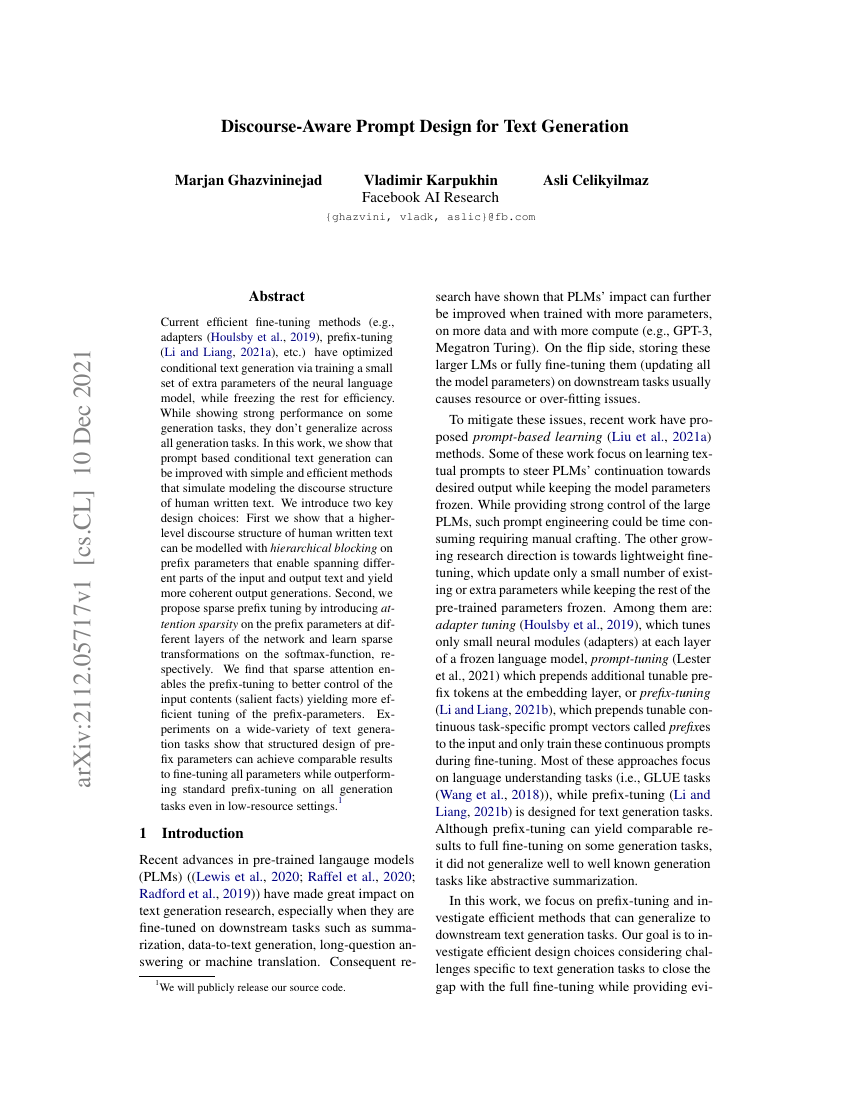

mentions from regular service:
['Houlsby', 'et', 'al', '.', '2019']
['Li', 'and', 'Liang', '2021a']
['Lewis', 'et', 'al', '.', '2020']
['Raffel', 'et', 'al', '.', '2020']
['Radford', 'et', 'al', '.', '2019']
['Liu', 'et', 'al', '.', '2021a']
['Houlsby', 'et', 'al', '.', '2019']
['Lester', 'et', 'al', '.', '2021']
['Li', 'and', 'Liang', '2021b']
['Wang', 'et', 'al', '.', '2018']
['Li', 'and', 'Liang', '2021b']

mentions from onnx service:
['Houlsby', 'et', 'al', '.', '2019']
['Li', 'and', 'Liang', '2021a']
['Lewis', 'et', 'al', '.', '2020']
['Raffel', 'et', 'al', '.', '2020']
['Radford', 'et', 'al', '.', '2019']
['Liu', 'et', 'al', '.', '2021a']
['Houlsby', 'et', 'al', '.', '2019']
['Lester', 'et', 'al', '.', '2021']
['Li', 'and', 'Liang', '2021b']
['Wang', 'et', 'al', '.', '2018']
['Li', 'and', 'Liang', '2021b']


In [4]:
pdf_file = pdfs_dir / "03bf74dfc38e44152b25bc94783d6d4dec11e4b1.pdf"
print(f"reading pdf from from {pdf_file}\n")

images = PDF2ImageRasterizer().rasterize(pdf_file, dpi=100)
display(images[0])
print_mentions(pdf_file)